# DeepSleep 
## Notas
* En Saola hay periodos que no se va a dormir y se une con el siguiente. Probar si es por el tamaño de los periodos

## v1

- board
- r (run duration)
- ds (deep sleep duration)
- TX (test version)

## T

- Muestra: 240seg
- PowerProfiler freq: 10ms

In [10]:
board="saola"
r = 20
ds = 30
TX = 1

batteries = [0.8, 2, 4, 10] #Ah

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

filename = f"../data/dslp--{board}_r{r}_ds{ds}-T{TX}.csv"
print(filename)

df = pd.read_csv(filename, parse_dates=["read_at", "timestamp"])

df.columns = ['index','read_at', 'millis', "dt", "v", "a", "w", "v_sh"]
df

../data/dslp--saola_r20_ds30-T1.csv


,index,read_at,millis,dt,v,a,w,v_sh
0,0,2025-03-04 17:27:07.682460,468237,2025-03-04 17:27:07,5.064,0.0860,0.43550,0.00860
1,1,2025-03-04 17:27:07.693145,468248,2025-03-04 17:27:07,5.064,0.0304,0.15395,0.00304
2,2,2025-03-04 17:27:07.704420,468258,2025-03-04 17:27:07,5.080,0.0300,0.15240,0.00300
3,3,2025-03-04 17:27:07.715429,468270,2025-03-04 17:27:07,5.080,0.0300,0.15240,0.00300
4,4,2025-03-04 17:27:07.726385,468280,2025-03-04 17:27:07,5.080,0.0300,0.15240,0.00300
...,...,...,...,...,...,...,...,...
20966,20966,2025-03-04 17:31:07.629495,708175,2025-03-04 17:31:07,5.080,0.0304,0.15443,0.00304
20967,20967,2025-03-04 17:31:07.640033,708185,2025-03-04 17:31:07,5.080,0.0304,0.15443,0.00304
20968,20968,2025-03-04 17:31:07.650503,708196,2025-03-04 17:31:07,5.080,0.0304,0.15443,0.00304
20969,20969,2025-03-04 17:31:07.662434,708208,2025-03-04 17:31:07,5.080,0.0304,0.15443,0.00304


In [12]:
#remove the trailing data before reset
d = df#[df.millis.idxmin():]
d

,index,read_at,millis,dt,v,a,w,v_sh
0,0,2025-03-04 17:27:07.682460,468237,2025-03-04 17:27:07,5.064,0.0860,0.43550,0.00860
1,1,2025-03-04 17:27:07.693145,468248,2025-03-04 17:27:07,5.064,0.0304,0.15395,0.00304
2,2,2025-03-04 17:27:07.704420,468258,2025-03-04 17:27:07,5.080,0.0300,0.15240,0.00300
3,3,2025-03-04 17:27:07.715429,468270,2025-03-04 17:27:07,5.080,0.0300,0.15240,0.00300
4,4,2025-03-04 17:27:07.726385,468280,2025-03-04 17:27:07,5.080,0.0300,0.15240,0.00300
...,...,...,...,...,...,...,...,...
20966,20966,2025-03-04 17:31:07.629495,708175,2025-03-04 17:31:07,5.080,0.0304,0.15443,0.00304
20967,20967,2025-03-04 17:31:07.640033,708185,2025-03-04 17:31:07,5.080,0.0304,0.15443,0.00304
20968,20968,2025-03-04 17:31:07.650503,708196,2025-03-04 17:31:07,5.080,0.0304,0.15443,0.00304
20969,20969,2025-03-04 17:31:07.662434,708208,2025-03-04 17:31:07,5.080,0.0304,0.15443,0.00304


Text(0.5, 1.0, 'Current')

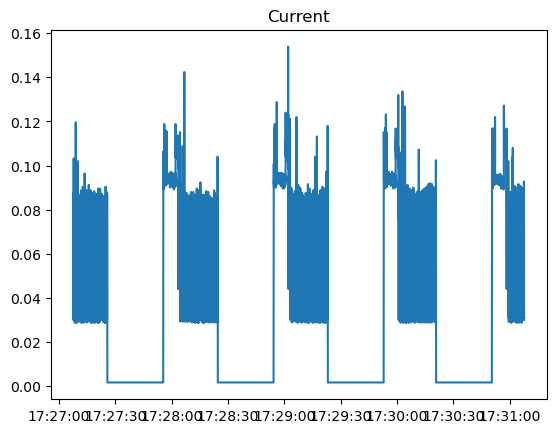

In [13]:
plt.plot(d.read_at, d.a)
plt.title("Current")

Text(0.5, 1.0, 'Voltage')

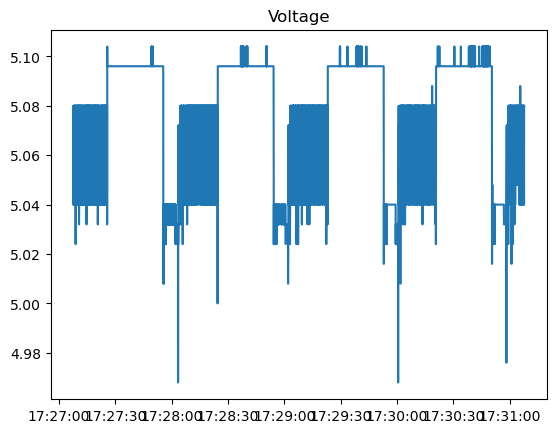

In [14]:
plt.plot(d.read_at, d.v)
plt.title("Voltage")

In [15]:
from scipy import integrate

time_data = (d.read_at - d.read_at.iloc[0]).dt.total_seconds()
current_data = d.a.to_numpy()
total_current = integrate.trapezoid(current_data, time_data)
total_current #A in timespan

np.float64(7.314409226)

In [16]:
time_span = max(time_data)
time_span #seg

239.990973

In [17]:
avg_current = total_current / time_span
avg_current #A

np.float64(0.030477851456521245)

## Expected runtime using batteries

In [18]:
for bat_usable_cap in batteries: #Amp hour
    runtime = bat_usable_cap / avg_current
    print(f"At {bat_usable_cap:.02f}Ah:\t{runtime:.01f} hours,\t{runtime/24:.02f} days")

At 0.80Ah:	26.2 hours,	1.09 days
At 2.00Ah:	65.6 hours,	2.73 days
At 4.00Ah:	131.2 hours,	5.47 days
At 10.00Ah:	328.1 hours,	13.67 days
